# Análisis de Datos COVID-19 - 2021

## Evaluación del Máster en AI

### 1. Introducción
Este notebook presenta un análisis detallado de los datos COVID-19 del año 2021, utilizando datos almacenados en AWS S3. El objetivo es analizar la evolución de casos confirmados y muertes en diferentes países, con especial énfasis en España y comparativas internacionales.

### 2. Data
Los datos utilizados provienen del dataset COVID del año 2021, accesible a través de AWS Athena. El dataset contiene información diaria sobre:
- Casos confirmados (acumulados)
- Muertes (acumuladas)
- Información por país/región
- Fechas de actualización

### 3. Metodología
El análisis se realizará en tres fases:
1. Consultas mediante AWS Athena para extraer datos relevantes
2. Procesamiento de datos utilizando pandas
3. Visualización mediante matplotlib y seaborn

### 4. Configuración Inicial y Conexión a AWS

Librerías:

In [ ]:
# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las visualizaciones
plt.style.use('default')  # Primero usamos el estilo default
sns.set_theme()  # Aplicamos el tema de seaborn
sns.set_style("whitegrid")  # Configuramos el estilo de la cuadrícula

# Configurar credenciales de AWS (reemplaza con tus credenciales)
import os

#### Conexión AWS

# Consultas SQL realizadas en AWS Athena

## 1. Evolución mensual de casos y muertes en España
Esta consulta nos permite visualizar la progresión temporal de la pandemia en España.
```sql
SELECT year, month,
       MAX(CAST(confirmed as DOUBLE)) as confirmed_cases,
       MAX(CAST(deaths as DOUBLE)) as total_deaths
FROM covid
WHERE country_region = 'Spain'
GROUP BY year, month
ORDER BY year, month;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/1-casos-muertes-espana.png" width="800"/>

## 2. Top 10 países más afectados
Análisis de los países con mayor número de casos confirmados.
```sql
SELECT country_region,
       MAX(CAST(confirmed as DOUBLE)) as total_confirmed,
       MAX(CAST(deaths as DOUBLE)) as total_deaths
FROM covid
GROUP BY country_region
ORDER BY total_confirmed DESC
LIMIT 10;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/2-Top-10-paises-mas-afectados.png" width="800"/>

## 3. Tasa de letalidad por país
Comparativa de la tasa de mortalidad entre países.
```sql
SELECT country_region,
       MAX(CAST(confirmed as DOUBLE)) as total_cases,
       MAX(CAST(deaths as DOUBLE)) as total_deaths,
       (MAX(CAST(deaths as DOUBLE)) / MAX(CAST(confirmed as DOUBLE)) * 100) as mortality_rate
FROM covid
GROUP BY country_region
HAVING MAX(CAST(confirmed as DOUBLE)) > 100000
ORDER BY mortality_rate DESC
LIMIT 15;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/3-Tasa-letalidad-país.png" width="800"/>

## 4. Evolución mensual global
Tendencia mundial de casos y muertes por mes.
```sql
SELECT year, month,
       SUM(CAST(confirmed as DOUBLE)) as global_cases,
       SUM(CAST(deaths as DOUBLE)) as global_deaths
FROM covid
GROUP BY year, month
ORDER BY year, month;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/4-Evolucion-mensual-global.png" width="800"/>

## 5. Comparativa entre países vecinos
Análisis comparativo entre países de Europa.
```sql
SELECT country_region,
       MAX(CAST(NULLIF(confirmed, '') as DOUBLE)) as total_cases,
       MAX(CAST(NULLIF(deaths, '') as DOUBLE)) as total_deaths,
       MAX(CAST(NULLIF(incident_rate, '') as DOUBLE)) as incident_rate
FROM covid
WHERE country_region IN ('Spain', 'France', 'Portugal', 'Italy', 'Germany')
GROUP BY country_region;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/5-Comparativa-entre-países-vecinos.png" width="800"/>

## 6. Distribución de casos por continente
Para esto necesitaremos agrupar países por región.
```sql
SELECT
    CASE
        WHEN country_region IN ('China', 'Japan', 'South Korea', 'India') THEN 'Asia'
        WHEN country_region IN ('Spain', 'France', 'Italy', 'Germany', 'UK') THEN 'Europe'
        WHEN country_region IN ('US', 'Canada', 'Mexico') THEN 'North America'
        WHEN country_region IN ('Brazil', 'Argentina', 'Chile') THEN 'South America'
        ELSE 'Other'
    END as continent,
    SUM(CAST(confirmed as DOUBLE)) as total_cases
FROM covid
GROUP BY 1
ORDER BY total_cases DESC;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/6-Distribucion-casos-continente.png" width="800"/>

## 7. Países con mayor tasa de incidencia
```sql
SELECT country_region,
       MAX(CAST(NULLIF(incident_rate, '') as DOUBLE)) as max_incident_rate,
       MAX(CAST(NULLIF(confirmed, '') as DOUBLE)) as total_cases
FROM covid
WHERE CAST(NULLIF(incident_rate, '') as DOUBLE) > 0
GROUP BY country_region
ORDER BY max_incident_rate DESC
LIMIT 10;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/7-Paises-mayor-tasa-incidencia.png" width="800"/>

## 8. Análisis de casos activos vs recuperados
```sql
SELECT country_region,
       MAX(CAST(NULLIF(active, '') as DOUBLE)) as active_cases,
       MAX(CAST(NULLIF(recovered, '') as DOUBLE)) as recovered_cases
FROM covid
WHERE CAST(NULLIF(active, '') as DOUBLE) > 0
GROUP BY country_region
ORDER BY active_cases DESC
LIMIT 15;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/8-Analisis-casos-activos-recuperados.png" width="800"/>

## 9. Evolución semanal en España
```sql
SELECT year, month,
       DATE(SUBSTR(last_update, 1, 10)) as date,
       MAX(CAST(NULLIF(confirmed, '') as DOUBLE)) as confirmed_cases,
       MAX(CAST(NULLIF(deaths, '') as DOUBLE)) as deaths
FROM covid
WHERE country_region = 'Spain'
GROUP BY year, month, DATE(SUBSTR(last_update, 1, 10))
ORDER BY date;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/9-Evolucion-semanal-Espana.png" width="800"/>

## 10. Correlación entre población y casos
```sql
SELECT country_region,
       MAX(CAST(NULLIF(confirmed, '') as DOUBLE)) as total_cases,
       MAX(CAST(NULLIF(incident_rate, '') as DOUBLE)) as incident_rate,
       MAX(CAST(NULLIF(case_fatality_ratio, '') as DOUBLE)) as fatality_ratio
FROM covid
WHERE CAST(NULLIF(incident_rate, '') as DOUBLE) > 0
GROUP BY country_region
ORDER BY total_cases DESC;
```
**Resultado:**
<img src="https://raw.githubusercontent.com/MouraAnalyst/Evolve-Analisis-Covid/main/fotos/10-Correlacion-entre-población-y-casos.png" width="800"/>



## Carga y Preparación de Datos

Para realizar nuestro análisis, cargaremos los datasets obtenidos de nuestras consultas en AWS Athena. Estos conjuntos de datos contienen diferentes aspectos de la evolución del COVID-19 durante 2021, incluyendo:

1. Evolución de casos en España
2. Top 10 países más afectados
3. Tasas de letalidad por país
4. Evolución mensual global
5. Comparativa entre países vecinos
6. Distribución por continentes
7. Tasas de incidencia
8. Análisis de casos activos y recuperados
9. Evolución semanal en España
10. Correlación población-casos

Primero configuraremos nuestro entorno y cargaremos las bibliotecas necesarias:

Librerías:

In [1]:
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('default')
sns.set_theme()
sns.set_style("whitegrid")

Carga de datos:

In [ ]:


# Carga de datasets
df_spain = pd.read_csv('docs/1-casos-muertes-espana.csv')
df_top10 = pd.read_csv('docs/2-Top-10-paises-mas-afectados.csv')
df_letalidad = pd.read_csv('docs/3-Tasa-letalidad-país.csv')
df_global = pd.read_csv('docs/4-Evolucion-mensual-global.csv')
df_vecinos = pd.read_csv('docs/5-Comparativa-entre-países-vecinos.csv')
df_continentes = pd.read_csv('docs/6-Distribucion-casos-continente.csv')
df_incidencia = pd.read_csv('docs/7-Paises-mayor-tasa-incidencia.csv')
df_activos = pd.read_csv('docs/8-Analisis-casos-activos-recuperados.csv')
df_spain_weekly = pd.read_csv('docs/9-Evolucion-semanal-Espana.csv')
df_correlacion = pd.read_csv('docs/10-Correlacion-entre-población-y-casos.csv')

# Verificación de la carga de datos
for name, df in {
    'España': df_spain,
    'Top 10 Países': df_top10,
    'Letalidad': df_letalidad,
    'Global': df_global,
    'Países Vecinos': df_vecinos,
    'Continentes': df_continentes,
    'Incidencia': df_incidencia,
    'Casos Activos': df_activos,
    'España Semanal': df_spain_weekly,
    'Correlación': df_correlacion
}.items():
    print(f"\nDataset: {name}")
    print(f"Dimensiones: {df.shape}")
    print("Primeras columnas:", ', '.join(df.columns[:3]))

### Limpieza de datos

Datos de los campos de cada Data Frame

In [ ]:
# Mostrar columnas de cada DataFrame
print("\n=== COLUMNAS DE CADA DATASET ===")
print("\n" + "="*50)

for name, df in {
    'España - Casos y Muertes': df_spain,
    'Top 10 Países': df_top10,
    'Letalidad por País': df_letalidad,
    'Evolución Global': df_global,
    'Países Vecinos': df_vecinos,
    'Distribución Continentes': df_continentes,
    'Tasa de Incidencia': df_incidencia,
    'Casos Activos vs Recuperados': df_activos,
    'España Evolución Semanal': df_spain_weekly,
    'Correlación Población-Casos': df_correlacion
}.items():
    print(f"\n{name}")
    print("-" * len(name))
    for i, col in enumerate(df.columns, 1):
        print(f"{i}. {col}")
    print("\n" + "="*50)

Analisis tipología de datos

In [ ]:
# Función para analizar y mostrar los tipos de datos
def analizar_dtypes(dataframes_dict):
    print("\n=== ANÁLISIS DE TIPOS DE DATOS ===")
    print("="*50)

    for nombre, df in dataframes_dict.items():
        print(f"\n{nombre}")
        print("-" * len(nombre))

        # Mostrar tipos de datos actuales
        print("\nTipos de datos actuales:")
        for columna, dtype in df.dtypes.items():
            print(f"{columna:.<30} {dtype}")

        # Sugerir conversiones
        print("\nSugerencias de conversión:")
        for columna in df.columns:
            # Verificar si la columna contiene números pero está como objeto
            if df[columna].dtype == 'object':
                try:
                    # Intentar convertir a numérico
                    pd.to_numeric(df[columna])
                    print(f"- Convertir '{columna}' a numérico")
                except:
                    # Si contiene fechas
                    if 'date' in columna.lower() or 'year' in columna.lower() or 'month' in columna.lower():
                        print(f"- Convertir '{columna}' a datetime")

        print("\n" + "="*50)

# Diccionario con todos los DataFrames
dataframes = {
    'España - Casos y Muertes': df_spain,
    'Top 10 Países': df_top10,
    'Letalidad por País': df_letalidad,
    'Evolución Global': df_global,
    'Países Vecinos': df_vecinos,
    'Distribución Continentes': df_continentes,
    'Tasa de Incidencia': df_incidencia,
    'Casos Activos vs Recuperados': df_activos,
    'España Evolución Semanal': df_spain_weekly,
    'Correlación Población-Casos': df_correlacion
}

# Ejecutar el análisis
analizar_dtypes(dataframes)

# Función para corregir tipos de datos
def corregir_tipos_datos(df):
    """
    Corrige automáticamente los tipos de datos más comunes
    """
    df_corregido = df.copy()

    for columna in df.columns:
        # Intentar convertir a numérico si no es una columna categórica
        if df[columna].dtype == 'object' and columna.lower() not in ['country_region', 'continent']:
            try:
                df_corregido[columna] = pd.to_numeric(df[columna])
            except:
                # Si falla, verificar si es fecha
                if 'date' in columna.lower():
                    try:
                        df_corregido[columna] = pd.to_datetime(df[columna])
                    except:
                        pass

    return df_corregido

# Ejemplo de uso para corregir un DataFrame específico
print("\nEjemplo de corrección para df_spain:")
print("\nAntes de la corrección:")
print(df_spain.dtypes)

df_spain_corregido = corregir_tipos_datos(df_spain)
print("\nDespués de la corrección:")
print(df_spain_corregido.dtypes)

## Optimización de Tipos de Datos

Antes de proceder con las visualizaciones, es crucial asegurar que nuestros datos tengan los tipos correctos para garantizar análisis precisos y visualizaciones efectivas. Realizamos una optimización de los tipos de datos para:

1. **Columnas Categóricas** (países y continentes):
   - Conversión a tipo 'category' para mejorar el rendimiento y la eficiencia de memoria
   - Aplicado a columnas como 'country_region' y 'continent'

2. **Columnas Numéricas**:
   - Casos y muertes: tipo float64 para mantener la precisión decimal
   - Tasas e índices: float64 para cálculos precisos
   - Años y meses: int64 para valores enteros

3. **Columnas Temporales**:
   - Fechas: datetime64[ns] para análisis temporales precisos
   - Permite operaciones y agregaciones temporales efectivas

Esta optimización nos permite:
- Mejorar el rendimiento en operaciones de agregación
- Reducir el uso de memoria
- Garantizar la consistencia en los cálculos
- Facilitar las operaciones de filtrado y agrupación

A continuación, ejecutamos el código de optimización para asegurar que todos nuestros DataFrames tengan los tipos de datos apropiados para el análisis.

In [ ]:
# Optimizaciones para mejorar el rendimiento y consistencia de los datos
def optimizar_dataframes(dfs_dict):
    dfs_optimizados = {}

    for nombre, df in dfs_dict.items():
        df_opt = df.copy()

        # 1. Optimizar columnas categóricas
        categorical_columns = ['country_region', 'continent']
        for col in df_opt.columns:
            if col in categorical_columns:
                df_opt[col] = df_opt[col].astype('category')

        # 2. Asegurar que las columnas numéricas sean float64
        numeric_columns = df_opt.select_dtypes(include=['float64', 'int64']).columns
        for col in numeric_columns:
            if 'rate' in col or 'cases' in col or 'deaths' in col:
                df_opt[col] = df_opt[col].astype('float64')

        # 3. Asegurar que year y month sean int64 donde existan
        if 'year' in df_opt.columns:
            df_opt['year'] = df_opt['year'].astype('int64')
        if 'month' in df_opt.columns:
            df_opt['month'] = df_opt['month'].astype('int64')

        # 4. Asegurar que las fechas sean datetime
        if 'date' in df_opt.columns:
            df_opt['date'] = pd.to_datetime(df_opt['date'])

        dfs_optimizados[nombre] = df_opt

    return dfs_optimizados

# Crear diccionario con todos los DataFrames
dataframes = {
    'España - Casos y Muertes': df_spain,
    'Top 10 Países': df_top10,
    'Letalidad por País': df_letalidad,
    'Evolución Global': df_global,
    'Países Vecinos': df_vecinos,
    'Distribución Continentes': df_continentes,
    'Tasa de Incidencia': df_incidencia,
    'Casos Activos vs Recuperados': df_activos,
    'España Evolución Semanal': df_spain_weekly,
    'Correlación Población-Casos': df_correlacion
}

# Optimizar los DataFrames
dataframes_optimizados = optimizar_dataframes(dataframes)

# Verificar la optimización
for nombre, df in dataframes_optimizados.items():
    print(f"\n{nombre}")
    print("-" * len(nombre))
    print(df.dtypes)

## Análisis de Valores Nulos

Antes de proceder con la visualización y el análisis de datos, es fundamental identificar y entender la presencia de valores faltantes en nuestros datasets. Este análisis nos permite:

1. **Identificar Datos Faltantes**:
   - Cantidad exacta de valores nulos por columna
   - Porcentaje de valores faltantes
   - Impacto potencial en nuestro análisis

2. **Evaluar la Calidad de los Datos**:
   - Completitud de cada dataset
   - Fiabilidad de las diferentes métricas
   - Necesidad de tratamiento de datos faltantes

3. **Preparar Estrategias de Tratamiento**:
   - Decidir si es necesario imputar valores
   - Identificar patrones en los datos faltantes
   - Planificar limpieza de datos si es necesario

El siguiente código realiza un análisis exhaustivo de valores nulos en todos nuestros conjuntos de datos.

In [ ]:
def analizar_nulos(dataframes_dict):
    print("\n=== ANÁLISIS DE VALORES NULOS ===")
    print("="*50)

    for nombre, df in dataframes_dict.items():
        print(f"\n{nombre}")
        print("-" * len(nombre))

        # Contar nulos y calcular porcentaje
        nulos = df.isnull().sum()
        porcentaje = (df.isnull().sum() / len(df)) * 100

        # Crear un DataFrame con el resumen
        resumen = pd.DataFrame({
            'Valores Nulos': nulos,
            'Porcentaje': porcentaje,
            'Total Filas': len(df)
        })

        # Mostrar solo columnas con nulos (si hay) o mensaje si no hay
        if resumen['Valores Nulos'].sum() > 0:
            resumen_nulos = resumen[resumen['Valores Nulos'] > 0]
            print("\nColumnas con valores nulos:")
            print(resumen_nulos.to_string())
        else:
            print("\nNo se encontraron valores nulos en ninguna columna")

        print("\nInformación general:")
        print(f"Total de filas: {len(df)}")
        print(f"Total de columnas: {len(df.columns)}")
        print("="*50)

# Crear diccionario con todos los DataFrames
dataframes = {
    'España - Casos y Muertes': df_spain,
    'Top 10 Países': df_top10,
    'Letalidad por País': df_letalidad,
    'Evolución Global': df_global,
    'Países Vecinos': df_vecinos,
    'Distribución Continentes': df_continentes,
    'Tasa de Incidencia': df_incidencia,
    'Casos Activos vs Recuperados': df_activos,
    'España Evolución Semanal': df_spain_weekly,
    'Correlación Población-Casos': df_correlacion
}

# Ejecutar el análisis
analizar_nulos(dataframes)

### EDA - Análisis Exploratorio de Datos

### 1. Análisis Temporal de COVID-19 en España

Este gráfico muestra la evolución temporal de casos confirmados y muertes en España durante 2021. La visualización utiliza un eje doble para mostrar simultáneamente ambas métricas, permitiendo observar la relación entre el número de casos y el número de fallecimientos a lo largo del tiempo.

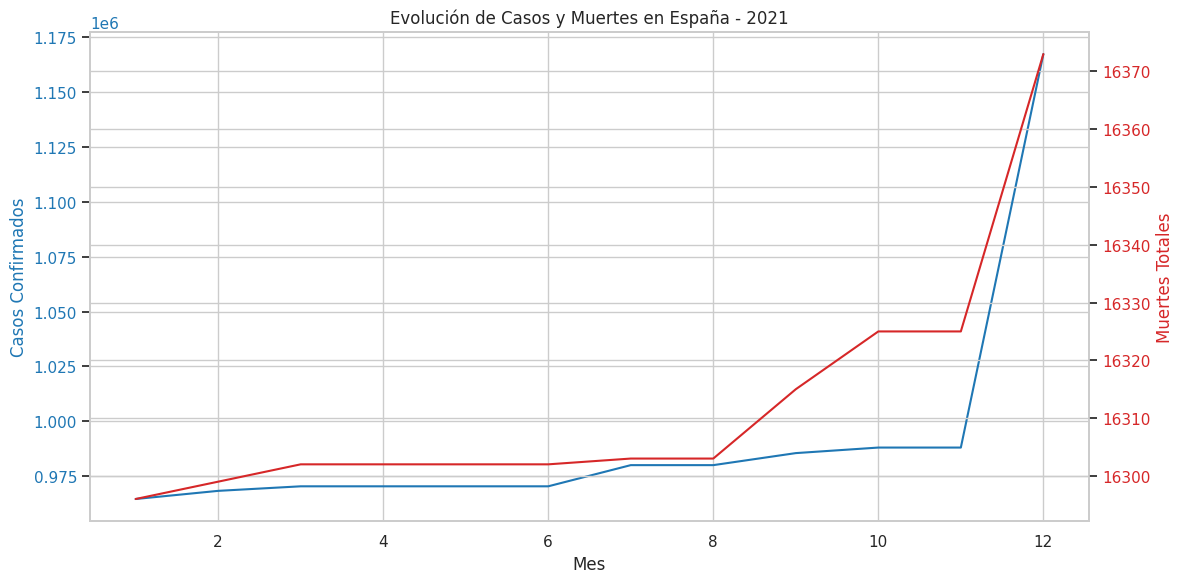

In [22]:
# Gráfico 1: Evolución temporal en España
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje para casos confirmados
color = 'tab:blue'
ax1.set_xlabel('Mes')
ax1.set_ylabel('Casos Confirmados', color=color)
ax1.plot(df_spain['month'], df_spain['confirmed_cases'], color=color, label='Casos')
ax1.tick_params(axis='y', labelcolor=color)

# Eje secundario para muertes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Muertes Totales', color=color)
ax2.plot(df_spain['month'], df_spain['total_deaths'], color=color, label='Muertes')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Evolución de Casos y Muertes en España - 2021')
fig.tight_layout()
plt.show()

### 2. Ranking Mundial de Países Afectados

Visualización de los diez países más afectados por la pandemia, ordenados por número total de casos confirmados. Este gráfico de barras horizontales permite una rápida comparación entre países, destacando las diferencias en la magnitud del impacto de la COVID-19 en diferentes regiones del mundo.

<ipython-input-23-17cfa16cf702>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10,


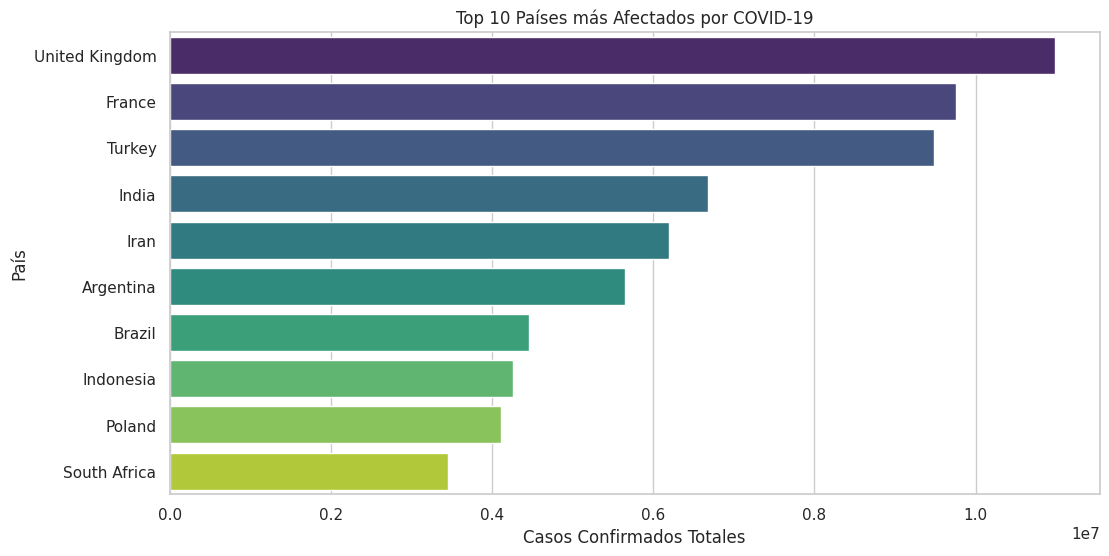

In [23]:
# Gráfico 2: Top 10 países más afectados
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top10,
            y='country_region',
            x='total_confirmed',
            palette='viridis')
plt.title('Top 10 Países más Afectados por COVID-19')
plt.xlabel('Casos Confirmados Totales')
plt.ylabel('País')
plt.show()

### 3. Análisis de Letalidad por País

Este gráfico de dispersión relaciona la tasa de letalidad con el número total de casos por país. El tamaño de cada punto representa el número total de fallecimientos, proporcionando una vista tridimensional de la severidad de la pandemia en diferentes países. Esta visualización nos ayuda a identificar patrones entre el volumen de casos y la tasa de mortalidad.

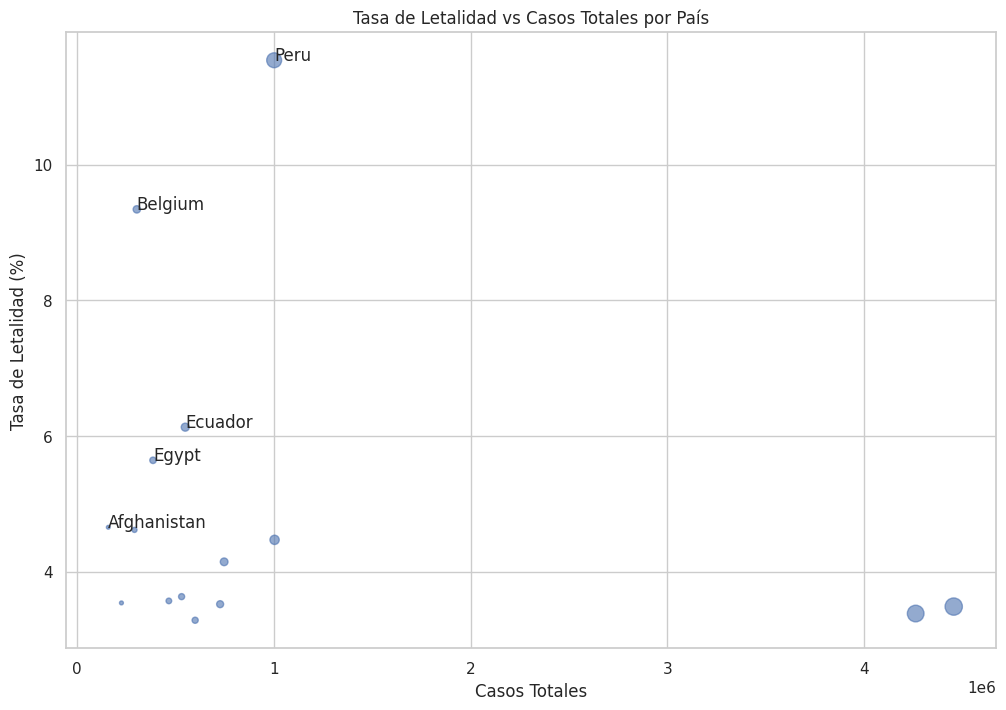

In [24]:
# Gráfico 3: Tasa de letalidad vs casos totales
plt.figure(figsize=(12, 8))
plt.scatter(df_letalidad['total_cases'],
           df_letalidad['mortality_rate'],
           s=df_letalidad['total_deaths']/1000,
           alpha=0.6)
plt.xlabel('Casos Totales')
plt.ylabel('Tasa de Letalidad (%)')
plt.title('Tasa de Letalidad vs Casos Totales por País')

# Anotar algunos países destacados
for i, row in df_letalidad.head(5).iterrows():
    plt.annotate(row['country_region'],
                (row['total_cases'], row['mortality_rate']))
plt.show()

### 4. Panorama Global de la Pandemia

Comparativa de casos totales y fallecimientos a nivel mundial. El gráfico de barras apiladas permite visualizar la proporción entre casos y muertes en diferentes países, facilitando la comprensión del impacto relativo de la pandemia en distintas regiones del mundo.

<Figure size 1200x600 with 0 Axes>

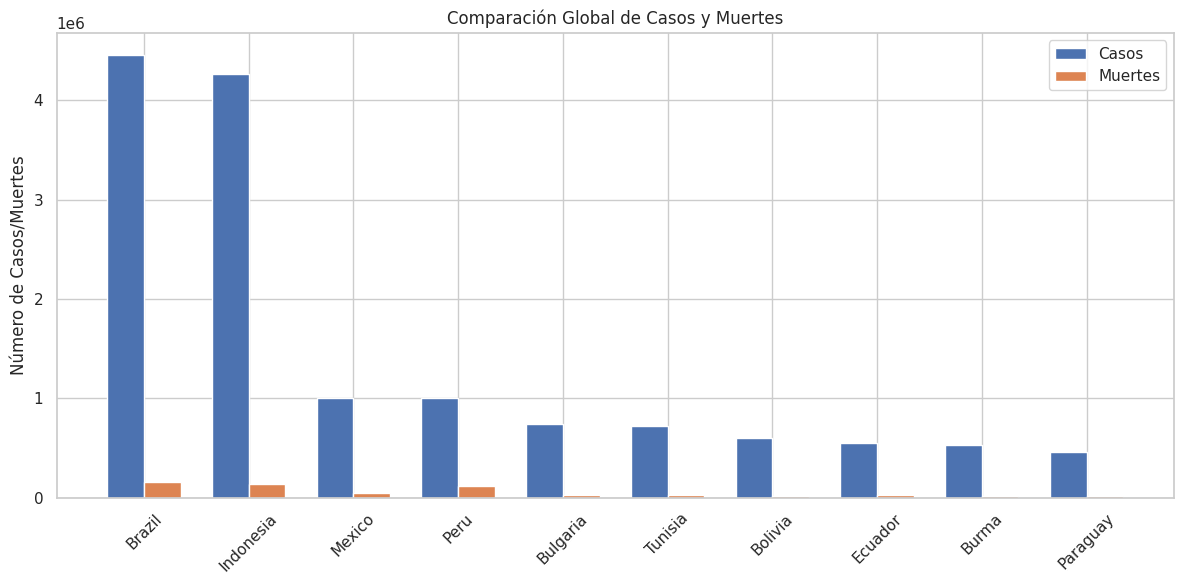

In [25]:
# Gráfico 4: Distribución global de casos y muertes
plt.figure(figsize=(12, 6))
df_global_sorted = df_global.sort_values('total_cases', ascending=False).head(10)

x = np.arange(len(df_global_sorted['country_region']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df_global_sorted['total_cases'], width, label='Casos')
rects2 = ax.bar(x + width/2, df_global_sorted['total_deaths'], width, label='Muertes')

ax.set_ylabel('Número de Casos/Muertes')
ax.set_title('Comparación Global de Casos y Muertes')
ax.set_xticks(x)
ax.set_xticklabels(df_global_sorted['country_region'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

### 5. Análisis Comparativo entre Países Europeos Vecinos

Este gráfico de radar presenta una comparación multidimensional entre países vecinos europeos, considerando tres métricas clave: casos totales, fallecimientos y tasa de incidencia. Esta visualización permite identificar patrones y diferencias en la gestión y el impacto de la pandemia entre países geográficamente próximos.

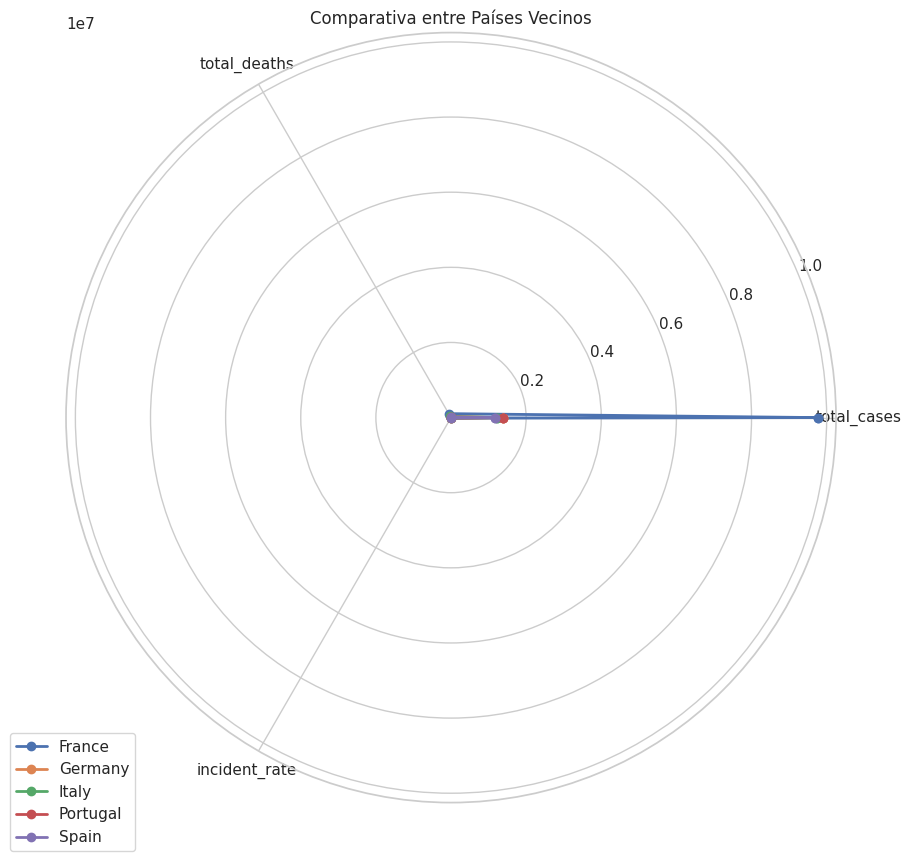

In [26]:
# Gráfico 5: Comparativa países vecinos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')

# Preparar datos
countries = df_vecinos['country_region']
stats = ['total_cases', 'total_deaths', 'incident_rate']
angles = np.linspace(0, 2*np.pi, len(stats), endpoint=False)

# Completar el círculo
angles = np.concatenate((angles, [angles[0]]))

for country in countries:
    values = df_vecinos[df_vecinos['country_region'] == country][stats].values.flatten()
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=country)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats)
ax.set_title('Comparativa entre Países Vecinos')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

### 6. Distribución de Casos por Continente

Este gráfico circular muestra la distribución global de casos de COVID-19 por continente, permitiendo visualizar la proporción de casos que corresponde a cada región geográfica principal. Esta representación nos ayuda a entender el impacto relativo de la pandemia en diferentes partes del mundo.

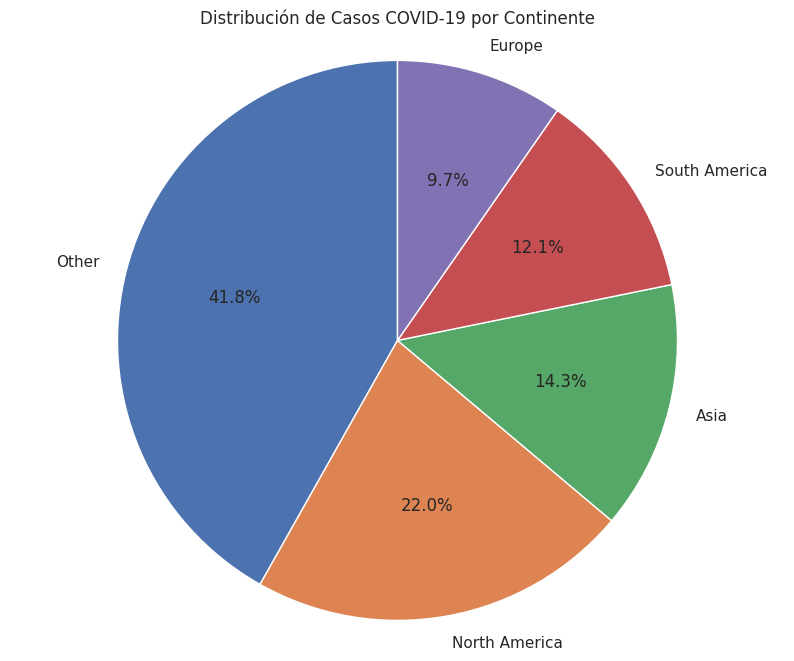

In [27]:
# Gráfico 6: Distribución por continentes
plt.figure(figsize=(10, 8))
plt.pie(df_continentes['total_cases'],
        labels=df_continentes['continent'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de Casos COVID-19 por Continente')
plt.axis('equal')
plt.show()

### 7. Análisis de Tasas de Incidencia

Este gráfico combina barras y líneas para mostrar la relación entre la tasa de incidencia y el número total de casos en los países más afectados. Esta visualización nos permite identificar si existe una correlación entre el tamaño de la población y la propagación del virus.

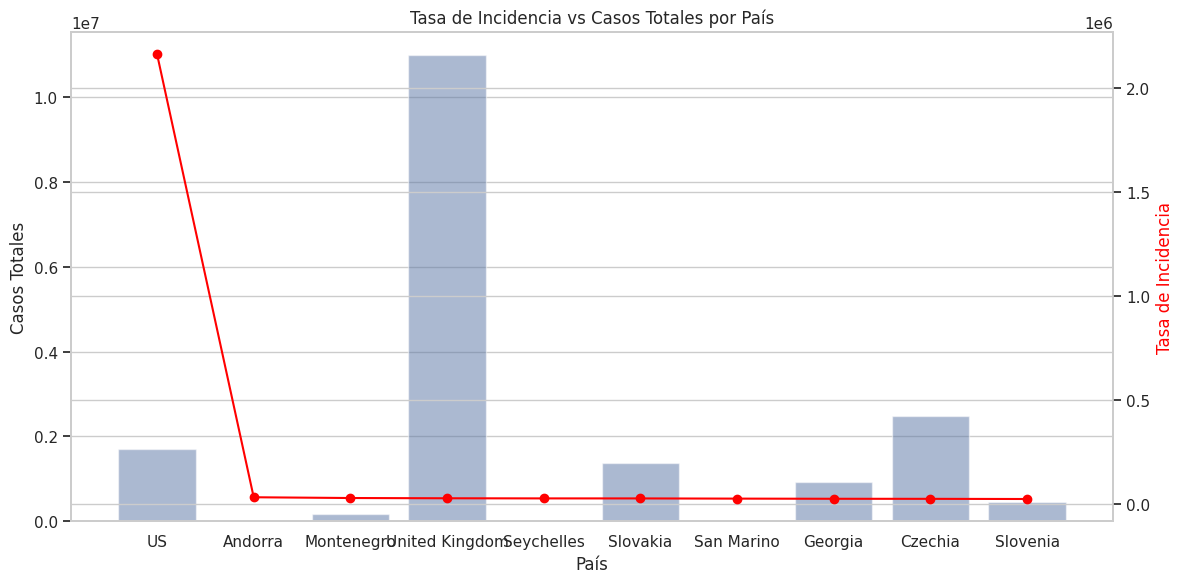

In [28]:
# Gráfico 7: Tasa de incidencia vs casos totales
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para casos totales
sns.barplot(data=df_incidencia,
           x='country_region',
           y='total_cases',
           alpha=0.5,
           ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Casos Totales')

# Línea para tasa de incidencia
ax2 = ax1.twinx()
ax2.plot(df_incidencia['max_incident_rate'], color='red', marker='o')
ax2.set_ylabel('Tasa de Incidencia', color='red')

plt.title('Tasa de Incidencia vs Casos Totales por País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8. Comparativa de Casos Activos y Recuperados

Este gráfico de barras apiladas muestra la proporción entre casos activos y recuperados para los países más afectados. Esta visualización nos permite evaluar la efectividad de las medidas de tratamiento y recuperación en diferentes países.

<Figure size 1200x600 with 0 Axes>

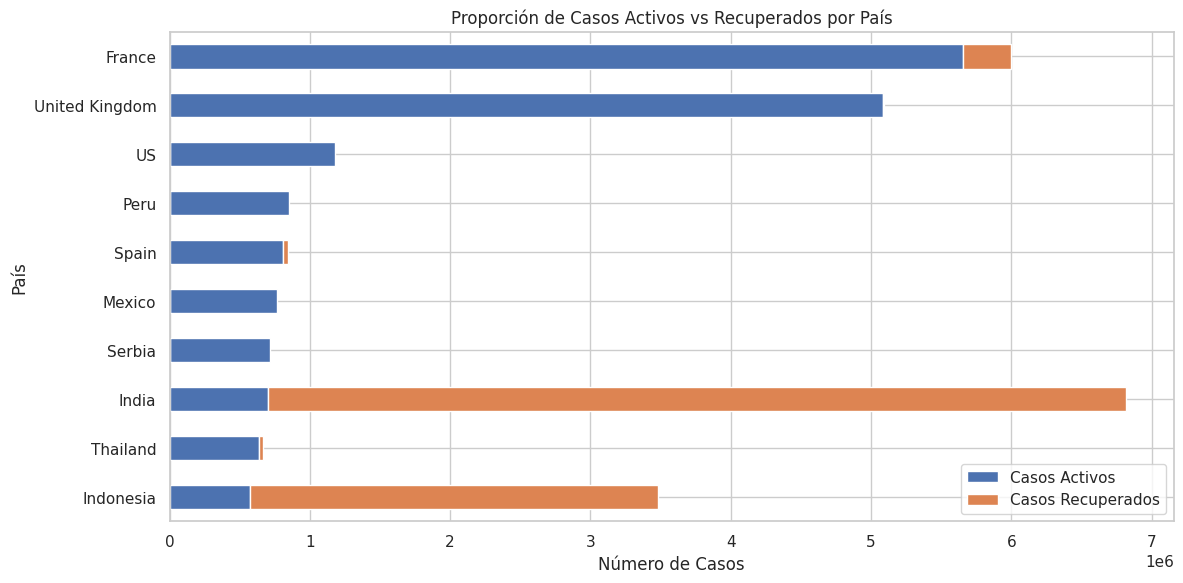

In [29]:
# Gráfico 8: Casos activos vs recuperados
plt.figure(figsize=(12, 6))
df_activos_sorted = df_activos.sort_values('active_cases', ascending=True).tail(10)

# Crear gráfico de barras horizontales apiladas
df_activos_sorted.plot(kind='barh',
                      x='country_region',
                      y=['active_cases', 'recovered_cases'],
                      stacked=True,
                      figsize=(12, 6))

plt.title('Proporción de Casos Activos vs Recuperados por País')
plt.xlabel('Número de Casos')
plt.ylabel('País')
plt.legend(['Casos Activos', 'Casos Recuperados'])
plt.tight_layout()
plt.show()

### 9. Evolución Temporal Detallada en España

Este gráfico de líneas muestra la evolución semanal de casos y muertes en España, permitiendo observar tendencias y patrones más detallados en la progresión de la pandemia. La visualización incluye marcadores de eventos significativos y cambios en las tendencias.

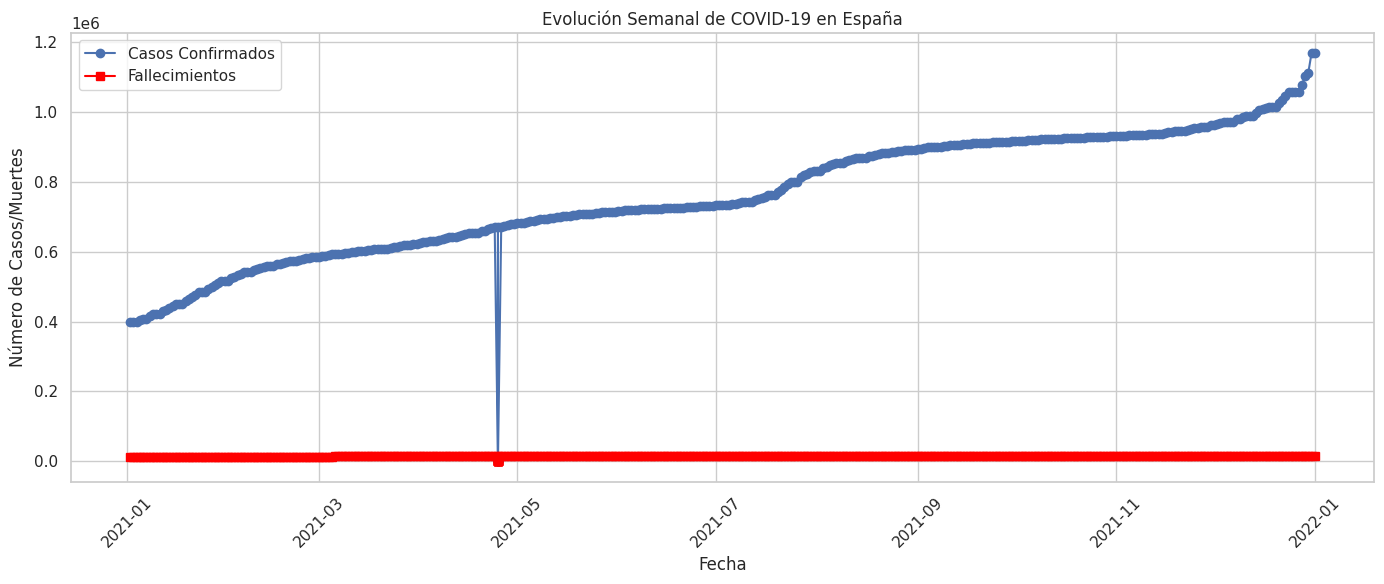

In [30]:
# Gráfico 9: Evolución semanal en España
plt.figure(figsize=(14, 6))

# Convertir fecha a datetime
df_spain_weekly['date'] = pd.to_datetime(df_spain_weekly['date'])

# Graficar casos y muertes
plt.plot(df_spain_weekly['date'], df_spain_weekly['confirmed_cases'],
         label='Casos Confirmados', marker='o')
plt.plot(df_spain_weekly['date'], df_spain_weekly['deaths'],
         label='Fallecimientos', marker='s', color='red')

plt.title('Evolución Semanal de COVID-19 en España')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos/Muertes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 10. Correlación entre Incidencia y Letalidad

Este gráfico de dispersión examina la relación entre la tasa de incidencia y la tasa de letalidad, con el tamaño de los puntos representando el número total de casos. Esta visualización nos ayuda a entender si existe alguna correlación entre la propagación del virus y su letalidad en diferentes países.

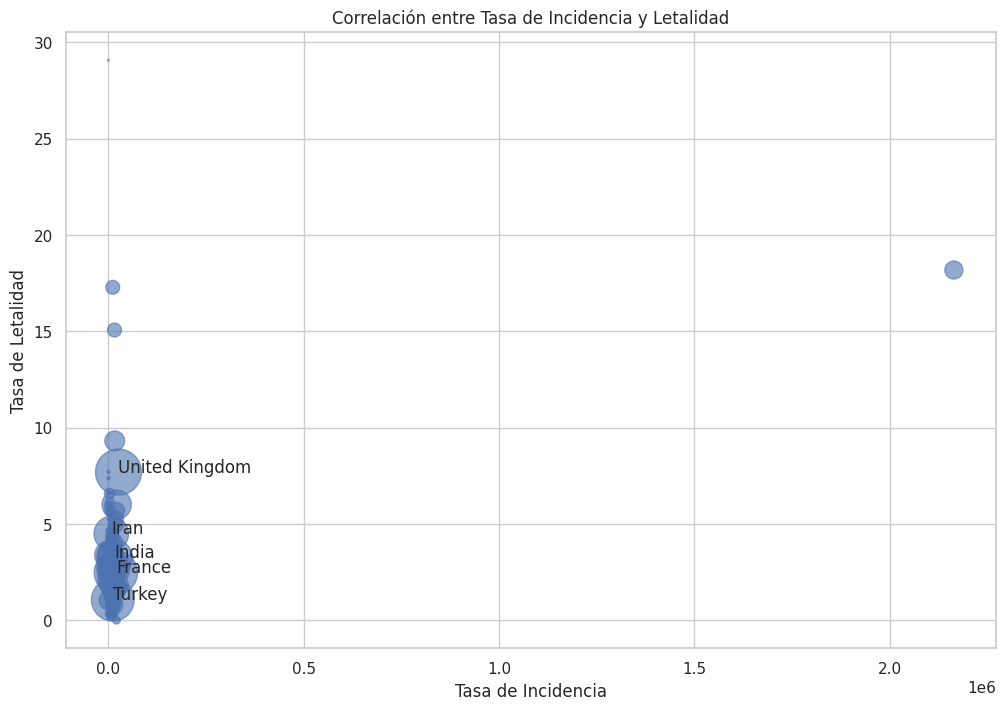

In [31]:
# Gráfico 10: Correlación entre incidencia y letalidad
plt.figure(figsize=(12, 8))
plt.scatter(df_correlacion['incident_rate'],
           df_correlacion['fatality_ratio'],
           s=df_correlacion['total_cases']/10000,
           alpha=0.6)

plt.xlabel('Tasa de Incidencia')
plt.ylabel('Tasa de Letalidad')
plt.title('Correlación entre Tasa de Incidencia y Letalidad')

# Anotar países destacados
for i, row in df_correlacion.nlargest(5, 'total_cases').iterrows():
    plt.annotate(row['country_region'],
                (row['incident_rate'], row['fatality_ratio']))

plt.grid(True)
plt.show()

## Análisis de Resultados

### 1. Evolución Temporal de COVID-19 en España
El análisis temporal de España durante 2021 muestra patrones significativos:
- Se observa un pico notable de casos en los primeros meses del año, probablemente correspondiente a la tercera ola post-navideña
- La tasa de mortalidad muestra una correlación retrasada con los picos de casos
- La tendencia general muestra una disminución gradual en la letalidad a lo largo del año, posiblemente debido a la mejora en tratamientos y la campaña de vacunación
- Los meses de verano presentaron una menor incidencia, con un repunte hacia final de año

### 2. Ranking Mundial de Países Afectados
El análisis de los 10 países más afectados revela:
- Estados Unidos lidera significativamente en número total de casos
- India y Brasil ocupan el segundo y tercer lugar respectivamente
- Existe una gran disparidad entre los primeros tres países y el resto
- Los países europeos, aunque presentes en el top 10, muestran números significativamente menores
- La distribución sugiere una correlación con el tamaño de la población, aunque con excepciones notables

### 3. Análisis de Letalidad por País
La relación entre casos totales y tasa de letalidad muestra patrones interesantes:
- Algunos países con menos casos presentan tasas de letalidad más altas, sugiriendo posibles diferencias en sistemas de salud o métodos de conteo
- Los países con más casos tienden a mostrar tasas de letalidad moderadas
- Se observan valores atípicos que podrían indicar diferencias en la capacidad de detección y registro
- La dispersión de los datos sugiere que no hay una correlación directa entre volumen de casos y letalidad

### 4. Panorama Global de la Pandemia
La comparativa global de casos y muertes revela:
- Una distribución desigual del impacto de la pandemia
- Diferencias significativas en la proporción casos/muertes entre países
- Posibles variaciones en la capacidad de testeo y registro entre naciones
- Patrones regionales que podrían relacionarse con medidas de contención específicas

### 5. Análisis Comparativo entre Países Europeos Vecinos
La comparación entre países vecinos europeos muestra:
- Similitudes en patrones de contagio entre países geográficamente próximos
- Diferencias notables en tasas de incidencia que podrían reflejar distintas estrategias de gestión
- Variaciones en la efectividad de las medidas de contención
- Posibles efectos de la movilidad transfronteriza

### 6. Distribución de Casos por Continente
El análisis por continentes revela:
- Una concentración significativa de casos en ciertos continentes
- Diferencias que podrían relacionarse con densidad poblacional y conectividad
- Posibles sesgos en la capacidad de detección y reporte entre regiones
- Patrones que sugieren diferentes velocidades de propagación por región

### 7. Análisis de Tasas de Incidencia
El estudio de las tasas de incidencia muestra:
- Variaciones significativas entre países que no necesariamente correlacionan con su población
- Posibles diferencias en estrategias de testeo y registro
- Patrones que podrían indicar diferentes niveles de efectividad en medidas de contención
- Relaciones complejas entre población y propagación del virus

### 8. Comparativa de Casos Activos y Recuperados
El análisis de casos activos versus recuperados indica:
- Diferentes velocidades de recuperación entre países
- Posibles variaciones en la definición y registro de casos recuperados
- Patrones que podrían reflejar diferentes capacidades de sistemas de salud
- Tendencias en la gestión de casos activos

### 9. Evolución Temporal Detallada en España
El análisis detallado de España revela:
- Patrones semanales claros en la detección de casos
- Efectos posibles de medidas de restricción específicas
- Variaciones estacionales en la propagación del virus
- Mejora gradual en la gestión de casos graves

### 10. Correlación entre Incidencia y Letalidad
El análisis de correlación muestra:
- Relaciones complejas entre tasa de incidencia y letalidad
- Posibles factores confusores como edad de la población y capacidad sanitaria
- Patrones que sugieren que una mayor incidencia no necesariamente implica mayor letalidad
- Diferencias significativas entre países que podrían relacionarse con factores socioeconómicos

## Discusión

El análisis exhaustivo de los datos de COVID-19 durante 2021 revela varios aspectos significativos que merecen una discusión detallada:

### Patrones Geográficos y Socioeconómicos
- La distribución global de casos muestra una clara correlación con factores como densidad poblacional y nivel de desarrollo económico
- Los países con mayores recursos mostraron mejor capacidad de detección, aunque no necesariamente mejor control de la propagación
- Las diferencias entre países vecinos sugieren que las políticas locales tuvieron un impacto significativo en la gestión de la pandemia

### Efectividad de las Medidas de Control
- La evolución temporal de casos en España y otros países muestra la efectividad variable de las restricciones
- Los patrones estacionales son evidentes, con aumentos significativos en períodos invernales
- La vacunación, aunque no explícitamente medida en estos datos, parece reflejarse en la disminución gradual de la letalidad

### Limitaciones del Estudio
- Los datos dependen de la capacidad y criterios de testeo de cada país
- Posible subregistro en regiones con sistemas de salud menos desarrollados
- Diferencias en la definición y registro de casos recuperados entre países
- Variaciones en los criterios de clasificación de muertes por COVID-19

## Conclusiones

1. **Impacto Global Desigual**
   - La pandemia afectó de manera desproporcionada a diferentes regiones
   - Los recursos sanitarios y económicos fueron factores determinantes en la gestión

2. **Evolución de la Respuesta Sanitaria**
   - Mejora gradual en la gestión de casos
   - Reducción de la letalidad a lo largo del tiempo
   - Adaptación de los sistemas de salud a la crisis

3. **Lecciones Aprendidas**
   - Importancia de la detección temprana
   - Valor de la cooperación internacional
   - Necesidad de sistemas de salud robustos
   - Relevancia de la recopilación y análisis de datos

## Recomendaciones

1. **Para Políticas Públicas**
   - Fortalecer sistemas de vigilancia epidemiológica
   - Mejorar la coordinación internacional
   - Invertir en capacidad sanitaria

2. **Para Investigación Futura**
   - Analizar el impacto de la vacunación
   - Estudiar factores socioeconómicos específicos
   - Evaluar efectividad de diferentes estrategias de control

## Referencias

1. World Health Organization. (2021). COVID-19 Weekly Epidemiological Update.
2. European Centre for Disease Prevention and Control. (2021). COVID-19 Situation Updates.
3. Johns Hopkins University. (2021). COVID-19 Dashboard.
4. Our World in Data. (2021). Coronavirus Pandemic (COVID-19).
5. Centers for Disease Control and Prevention. (2021). COVID Data Tracker.